# Perceptron pour le reconnaissance de chiffres manuscrits

L'objectif de ce TP est de reconnaître des chiffres manuscrits d'une base de test à partir d'une base d'apprentissage et des réseaux de neurones. Les chiffres ont été normalisés et centrés dans une image de taille fixe $28\times 28$ pixels. 

On va travailler sur 2 bases de données de MNIST:
    - Standard: les chiffres manuscrits comprend un ensemble de 60 000 exemples d'apprentissage et un ensemble de 10 000 exemples de test. On va classifier 10 catégories de chiffres par perceptron (mono/multi couche).
    - DeepFake: l'idée est de distinguer les données Générées par un Modèle Générative GAN par apport aux chiffres manuscrits standard. On dispose de 4932x2 exemples d'apprentissage du chiffre 0 avec label real (standard), et label fake (généré). On va évaluer un modèle de classification binaire sur 991x2 exemples de test.

In [1]:
# importer des librairies avec tensorflow==1.15 , keras==2.3.1
import numpy as np
import tensorflow as tf
#from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Librairies et fonctions nécessaires au design des réseaux de neurones
import keras
from keras import layers
from keras import models
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,Activation
from keras.models import Model, Sequential


2024-05-22 14:53:46.538902: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-22 14:53:46.539166: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-22 14:53:46.541371: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-22 14:53:46.570139: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-22 14:53:47.045030: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

# Chargement des données
### Standard

In [3]:
# Nombre de classes
num_classes = 10

# Chargement base d'apprentissage et de test 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# normalisation 
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# transformation des images (matrices 28 x 28) en vecteur de dimension 784 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]*x_train.shape[2]))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]*x_test.shape[2]))
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 784)
60000 train samples
10000 test samples


# Perceptron mono couche
### Standard

In [16]:
# Création de l'architecture 
model = Sequential()
model.add(Dense(10, activation="softmax", input_dim=784))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Optimisation du modèle 

opt = keras.optimizers.Adam(learning_rate=1e-3) 

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['acc'])

history = model.fit(x_train, y_train,
          epochs=10,
          validation_data=(x_test, y_test),
          batch_size=16)

Epoch 1/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 4s 906us/step - acc: 0.8426 - loss: 0.6043 - val_acc: 0.9162 - val_loss: 0.2998
Epoch 2/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 4s 964us/step - acc: 0.9160 - loss: 0.2941 - val_acc: 0.9226 - val_loss: 0.2799
Epoch 3/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 4s 986us/step - acc: 0.9215 - loss: 0.2810 - val_acc: 0.9233 - val_loss: 0.2740
Epoch 4/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - acc: 0.9257 - loss: 0.2623 - val_acc: 0.9260 - val_loss: 0.2671
Epoch 5/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 4s 964us/step - acc: 0.9277 - loss: 0.2602 - val_acc: 0.9237 - val_loss: 0.2695
Epoch 6/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - acc: 0.9280 - loss: 0.2608 - val_acc: 0.9260 - val_loss: 0.2705
Epoch 7/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 3s 919us/step - acc: 0.9314 - loss: 0.2512 - val_acc: 0.9268 - val_loss: 0.2678
Epoch 8/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 4s 931us/step - acc: 0.9320 - loss: 0.2477 - val_acc: 0.9250 - val_loss: 0.2739
Epoch 9/10
3750/3750 ━━━━━━━

In [18]:
# Analyse des résultats 

def plot_training_analysis():
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
  plt.plot(epochs, val_loss,'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

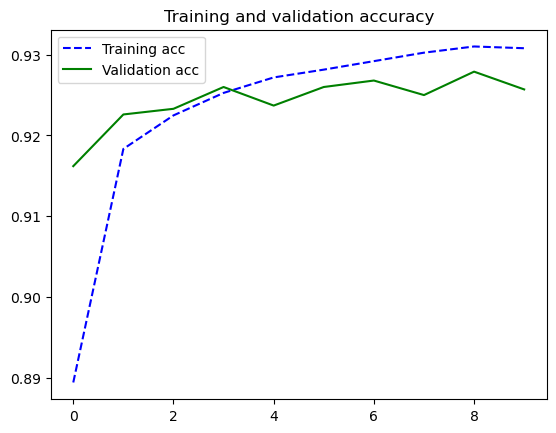

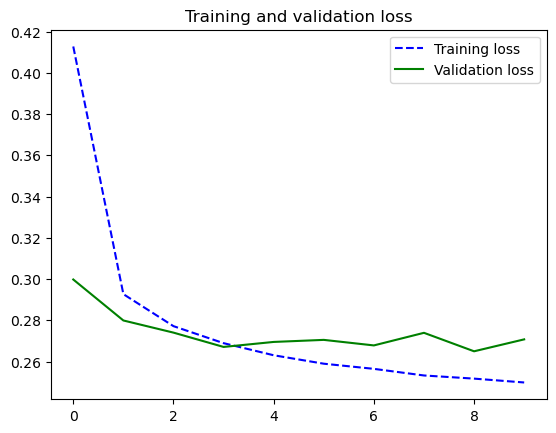

In [19]:
plot_training_analysis()

# Perceptron Multi-couches
### Standard

In [59]:
# Création de l'architecture 
model2 = Sequential()
model2.add(Dense(300, activation="relu", input_dim=784))
model2.add(Dense(300, activation="relu", input_dim =300))
model2.add(Dense(10, activation="softmax", input_dim =300))
model2.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_76 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 300)            │        90,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,810 (1.25 MB)

 Trainable params: 328,810 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
# Optimisation du modèle 

opt = keras.optimizers.Adam(learning_rate=0.01) 

model2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['acc'])

history = model2.fit(x_train, y_train,
          epochs=10,
          validation_data=(x_test, y_test),
          batch_size=16)

Epoch 1/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - acc: 0.8660 - loss: 0.4738 - val_acc: 0.9295 - val_loss: 0.3062
Epoch 2/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - acc: 0.9376 - loss: 0.2461 - val_acc: 0.9480 - val_loss: 0.1975
Epoch 3/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - acc: 0.9506 - loss: 0.1931 - val_acc: 0.9577 - val_loss: 0.1772
Epoch 4/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - acc: 0.9566 - loss: 0.1825 - val_acc: 0.9463 - val_loss: 0.2390
Epoch 5/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - acc: 0.9566 - loss: 0.1880 - val_acc: 0.9597 - val_loss: 0.2001
Epoch 6/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - acc: 0.9600 - loss: 0.1679 - val_acc: 0.9566 - val_loss: 0.2005
Epoch 7/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - acc: 0.9618 - loss: 0.1673 - val_acc: 0.9544 - val_loss: 0.2199
Epoch 8/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - acc: 0.9585 - loss: 0.1750 - val_acc: 0.9562 - val_loss: 0.2610
Epoch 9/10
3750/3750 ━━━━━━━━━━━

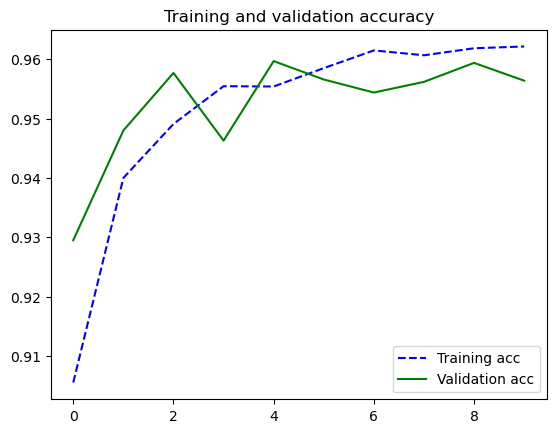

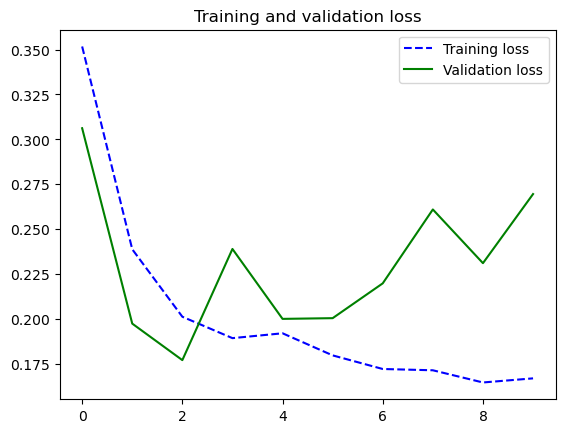

In [61]:
plot_training_analysis()

# Chargement des données
### DeepFake

In [98]:
# Nombre de classes
num_classes = 2

# Utiliser read_real_data et read_fake_data
# dans utils pour charger les donnees
from utils import read_real_data, read_fake_data

x_train_real = read_real_data('real_mnist_digit0_train')
x_train_fake = read_fake_data('fake_mnist_digit0_train')
x_test_real = read_real_data('real_mnist_digit0_val')
x_test_fake = read_fake_data('fake_mnist_digit0_val')

x_train = np.concatenate([x_train_real,x_train_fake],axis=0)
x_test = np.concatenate([x_test_real,x_test_fake],axis=0)

print('x_train',x_train.shape)
print('x_test',x_test.shape)



# Build y_train et y_test for x_train and x_test
# Denote the label real by 0
# Denote the label fake by 1
y_train = np.ones(x_train.shape[0])
y_train[:x_train_real.shape[0]] = 0
y_train[x_train_real.shape[0]:] = 1

print(y_train.shape[0])

y_test = np.ones(x_test.shape[0])
y_test[:x_test_real.shape[0]] = 0
y_test[x_test_real.shape[0]:] = 1

# Shuffle (a test)
rng_state = np.random.get_state()
arr1 = np.arange(10)
arr2 = np.arange(10)
np.random.shuffle(arr1)
np.random.set_state(rng_state)
np.random.shuffle(arr2)
print(arr1)
print(arr2)

# Shuffle training and test images and labels in a random order (index) 
rng_state = np.random.get_state()
np.random.shuffle(x_train)
np.random.set_state(rng_state)
np.random.shuffle(y_train)

rng_state = np.random.get_state()
np.random.shuffle(x_test)
np.random.set_state(rng_state)
np.random.shuffle(y_test)

# transformation des images (matrices 28 x 28) en vecteur de dimension 784 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]*x_train.shape[2]))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]*x_test.shape[2]))
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# Convert labels to categorical
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print(y_test.shape)


read_real_data (4932, 28, 28)
read_fake_data,pk.shape
read_real_data (991, 28, 28)
read_fake_data,pk.shape
x_train (9864, 28, 28)
x_test (1982, 28, 28)
9864
[3 5 6 7 8 4 0 9 2 1]
[3 5 6 7 8 4 0 9 2 1]
x_train shape: (9864, 784)
9864 train samples
1982 test samples
(1982, 2)


[1. 0.]


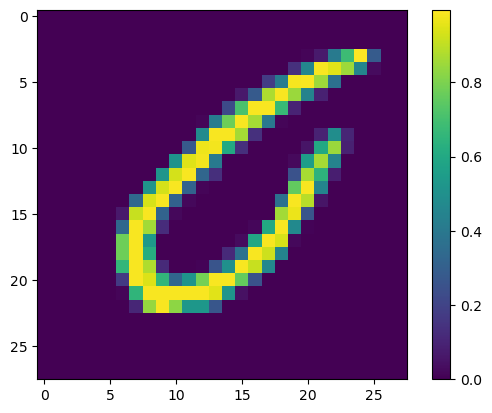

In [99]:
# Visualize une image
img = x_train[0,:].reshape(28,28)
plt.imshow(img)
plt.colorbar()

# Representation d'un label
label = y_test[0]
print(label)

# Perceptron mono couche
### DeepFake

In [100]:
# Création de l'architecture 
modelDF = Sequential()
modelDF.add(Dense(2, activation="softmax", input_dim=784))
modelDF.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_79 (Dense)                │ (None, 2)              │         1,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,570 (6.13 KB)

 Trainable params: 1,570 (6.13 KB)

 Non-trainable params: 0 (0.00 B)

In [104]:
# Optimisation du modèle 

opt = keras.optimizers.Adam(learning_rate=0.001) 

modelDF.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['acc'])

history = modelDF.fit(x_train, y_train,
          epochs=10,
          validation_data=(x_test, y_test),
          batch_size=16)

Epoch 1/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9782 - loss: 0.0726 - val_acc: 0.9743 - val_loss: 0.0866
Epoch 2/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.9773 - loss: 0.0717 - val_acc: 0.9733 - val_loss: 0.0866
Epoch 3/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.9810 - loss: 0.0666 - val_acc: 0.9748 - val_loss: 0.0860
Epoch 4/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.9837 - loss: 0.0654 - val_acc: 0.9778 - val_loss: 0.0843
Epoch 5/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.9809 - loss: 0.0675 - val_acc: 0.9773 - val_loss: 0.0855
Epoch 6/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.9797 - loss: 0.0649 - val_acc: 0.9763 - val_loss: 0.0847
Epoch 7/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9853 - loss: 0.0571 - val_acc: 0.9733 - val_loss: 0.0866
Epoch 8/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.9817 - loss: 0.0657 - val_acc: 0.9763 - val_loss: 0.0833
Epoch 9/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - ac

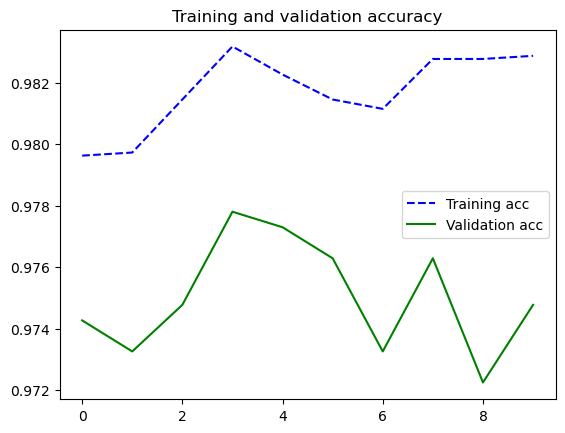

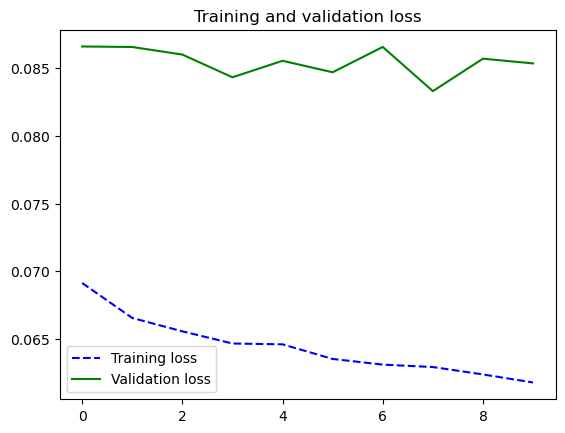

In [105]:
plot_training_analysis()

# Perceptron Multi-couches
### DeepFake

In [113]:
# Création de l'architecture 
modelDF2 = Sequential()
modelDF2.add(Dense(800, activation="relu", input_dim=784))
# modelDF2.add(Dense(300, activation="relu", input_dim =300))
modelDF2.add(Dense(2, activation="softmax", input_dim =800))
modelDF2.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_85 (Dense)                │ (None, 800)            │       628,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 2)              │         1,602 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 629,602 (2.40 MB)

 Trainable params: 629,602 (2.40 MB)

 Non-trainable params: 0 (0.00 B)

In [114]:
# Optimisation du modèle 

opt = keras.optimizers.Adam(learning_rate=0.01) 

modelDF2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['acc'])

history = modelDF2.fit(x_train, y_train,
          epochs=10,
          validation_data=(x_test, y_test),
          batch_size=16)

Epoch 1/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - acc: 0.6746 - loss: 0.7683 - val_acc: 0.8814 - val_loss: 0.2678
Epoch 2/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - acc: 0.9033 - loss: 0.2309 - val_acc: 0.9077 - val_loss: 0.2188
Epoch 3/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - acc: 0.9224 - loss: 0.1768 - val_acc: 0.9516 - val_loss: 0.1284
Epoch 4/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - acc: 0.9417 - loss: 0.1482 - val_acc: 0.9248 - val_loss: 0.1983
Epoch 5/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - acc: 0.9457 - loss: 0.1368 - val_acc: 0.9258 - val_loss: 0.2092
Epoch 6/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - acc: 0.9445 - loss: 0.1387 - val_acc: 0.9677 - val_loss: 0.0878
Epoch 7/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.9592 - loss: 0.1006 - val_acc: 0.9410 - val_loss: 0.1528
Epoch 8/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - acc: 0.9567 - loss: 0.1040 - val_acc: 0.9642 - val_loss: 0.0945
Epoch 9/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - ac

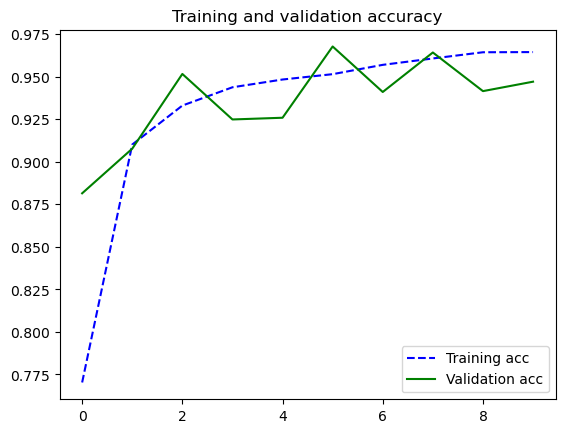

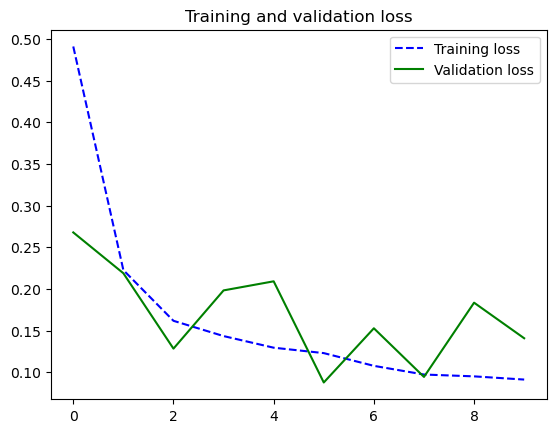

In [115]:
plot_training_analysis()